# 크롤링

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [17]:
for i in range(1,100,10):
    print(i)

1
11
21
31
41
51
61
71
81
91


In [18]:
num = 1   # + 10
title_list = []
for num in range(1, 100, 10):
    html = requests.get(f'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%95%84%EB%8F%99%ED%95%99%EB%8C%80&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=96&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start={num}')
    soup = BeautifulSoup(html.text, 'html.parser')
    for mem in soup.select('a.news_tit'):
        title_list.append(mem['title'])
        print(mem['title'])

시속 90㎞ 차 선루프 위로 아이들이 ‘쑥’…“아동학대”
청주시, 아동학대 예방 영상 제작
[단독] 학대로 '괴물' 된 아들…"집은 지옥이었다" 옥중 인터뷰
“자는 아이 깨우다 아동학대범으로 몰려요” [박현갑의 뉴스아이]
경기전교조 "5세 유아에게 초교 수업 요구는 아동학대"
“입양가정 편견, 아동학대 사망사건 재판에 영향 줄 수도”
<뉴스브릿지> '동반 자살' 아닌 극단적 아동학대
(영상)"내 딸 아동학대"…학원에 '문자폭탄' 보낸 학부모, 벌금형
"매일 매일 지옥이었다" 옥중 인터뷰 자처한 아동학대 피해자
담임 폭언에 "죽고 싶다"는 초등학생...때려야만 학대인가요?
[강원포럼]아동보호시설 변화·관심 필요
조용환 변호사 "어린이집 보육교사 아동학대 행위, 다른 보호자보다 더 무겁게 처벌"
유퀴즈 유재석·두리랜드 임채무... 아동만 할 수 있는 투표 온다 
아동학대·가정폭력 캠페인 공로 송파구,치안 으뜸파트너상 수상
장애 아동 때려 고막 상처 입힌 특수교사 ‘집행유예’
상반기 청주 학대 피해 아동 187명…전년보다 22명↓
“때려야만 폭행?” 눈에 보이지 않는 아동 정서학대…대부분이 '증거 불충분'
(영상)"내 딸 아동학대"…학원에 '문자폭탄' 보낸 학부모, 벌금형
3세 학대한 어린이집 보육교사 '처벌은?'
전교조 경기" 초교 입학 연령 하향…'아동 학대'"
시속 80km 카니발 선루프 위로 나온 아이들... 법조계 "아동학대"
“왜 말 안들어”… 장애아동 폭행한 특수교사, 집행유예
교육계 "만 5세 아이들에 40분씩 집중 요구는 아동학대다"
전교조 충북지부 "만 5세 조기 취학은 아동 학대"
포르투갈 검찰, 가톨릭 아동 성학대 조사 본격화…"7건 조사중"
거창군 아동위원회 아동학대 예방 홍보
수원시, 아동모니터링단 31명 활동 시작
[집중토론] 노인학대 예방 방안
교황 "실패의 무게 느낀다"…캐나다서 원주민 학대 거듭 사과
“아동학대, 체벌 인식전환 중요”, 완주군 사례종결 회의 돋보였다
"만 5세 입학은 아동학대"...교육부 학제 개편안에 뿔난 인천 교육

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWa

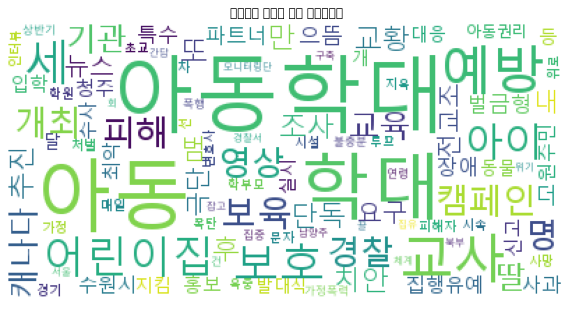

In [20]:
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import platform
okt = Okt()
title_list 
sentences_tag = []   
for article in title_list:
    sentences_tag.extend(okt.pos(article)) 
noun_adj_list = []
for word, tag in sentences_tag:
    if (tag in ['Noun' , 'Adjective']):
        noun_adj_list.append(word)


counts = Counter(noun_adj_list)
tags = counts.most_common(100)

if platform.system() == 'Windows':
    path = r'c:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin': # Mac OS
    path = r'/System/Library/Fonts/AppleGothic'
else:
    path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
wc = WordCloud(font_path=path, background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.title('아동학대 네이버 검색 형태소분석')
plt.show()